In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("netflix.csv")

In [44]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Unknown,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
df[["title","type"]].head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show
3,Jailbirds New Orleans,TV Show
4,Kota Factory,TV Show


In [51]:
movs = df[df["type"] == "Movie"]
print(movs.head())

   show_id   type                             title director  \
0       s1  Movie              Dick Johnson Is Dead  Unknown   
6       s7  Movie  My Little Pony: A New Generation  Unknown   
7       s8  Movie                           Sankofa  Unknown   
9      s10  Movie                      The Starling  Unknown   
12     s13  Movie                      Je Suis Karl  Unknown   

                                                 cast  \
0                                             Unknown   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   

                                              country          date_added  \
0                                       United States  September 25, 2021   
6                                             Unknown  September 24, 2021   
7   United States, Ghana, Burkina Faso, U

In [50]:
yr2000 = df[df["release_year"] == 2000]
print(yr2000.head())

    show_id   type                               title director  \
180    s181  Movie  The Nutty Professor II: The Klumps  Unknown   
350    s351  Movie                       Space Cowboys  Unknown   
359    s360  Movie        The Original Kings of Comedy  Unknown   
566    s567  Movie                    Charlie's Angels  Unknown   
593    s594  Movie                            Snow Day  Unknown   

                                                  cast  \
180  Eddie Murphy, Janet Jackson, Larry Miller, Joh...   
350  Clint Eastwood, Tommy Lee Jones, Donald Suther...   
359  Steve Harvey, D.L. Hughley, Cedric the Enterta...   
566  Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...   
593  Chris Elliott, Mark Webber, Jean Smart, Schuyl...   

                    country         date_added  release_year rating duration  \
180                 Unknown  September 1, 2021          2000  PG-13  107 min   
350           United States     August 1, 2021          2000  PG-13  130 min   
359     

In [21]:
time= pd.to_datetime(df["date_added"],errors = "coerce")
recent = df[time >= "2020-01-01"]
print(recent)

     show_id     type                                title          director  \
0         s1    Movie                 Dick Johnson Is Dead   Kirsten Johnson   
1         s2  TV Show                        Blood & Water               NaN   
2         s3  TV Show                            Ganglands   Julien Leclercq   
3         s4  TV Show                Jailbirds New Orleans               NaN   
4         s5  TV Show                         Kota Factory               NaN   
...      ...      ...                                  ...               ...   
8742   s8743    Movie                       Wild Wild West  Barry Sonnenfeld   
8743   s8744    Movie                             Wildlife         Paul Dano   
8745   s8746    Movie  Willy Wonka & the Chocolate Factory        Mel Stuart   
8764   s8765    Movie                           Wyatt Earp   Lawrence Kasdan   
8805   s8806    Movie                                 Zoom      Peter Hewitt   

                                       

In [40]:
fav = df[(df["type"] == "TV Show") & (df["country"] == "India") & (df["release_year"] >= 2000)]
print(fav)

     show_id     type                               title director  \
4         s5  TV Show                        Kota Factory  Unknown   
39       s40  TV Show                        Chhota Bheem  Unknown   
50       s51  TV Show                       Dharmakshetra  Unknown   
66       s67  TV Show       Raja Rasoi Aur Anya Kahaniyan  Unknown   
69       s70  TV Show      Stories by Rabindranath Tagore  Unknown   
...      ...      ...                                 ...      ...   
8173   s8174  TV Show                           Thackeray  Unknown   
8235   s8236  TV Show                         The Calling  Unknown   
8321   s8322  TV Show  The Golden Years with Javed Akhtar  Unknown   
8349   s8350  TV Show              The House That Made Me  Unknown   
8775   s8776  TV Show                     Yeh Meri Family  Unknown   

                                                   cast country  \
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   India   
39    Vatsal Dubey, Julie

Cleaning of the Dataset

In [23]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [24]:
df = df.dropna(subset = ["date_added"])

In [35]:
df = df.copy()
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["rating"] = df["rating"].fillna("UnRated")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


In [56]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Exploring and Manipulation

In [55]:
#Getting latest shows
df.sort_values("release_year",ascending = False).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Unknown,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",Unknown,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Unknown,Unknown,Unknown,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Unknown,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,Unknown,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Unknown,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."


In [58]:
#How many movies and series are listed
df["type"].value_counts()

type
Movie      6131
TV Show    2666
Name: count, dtype: int64

In [61]:
#how many of which rating are there
df.groupby("rating")["title"].count().sort_values(ascending = False)

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
UnRated        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: title, dtype: int64

In [68]:
#total rows and cols now
df.shape

(8797, 12)

Visulization of the Data

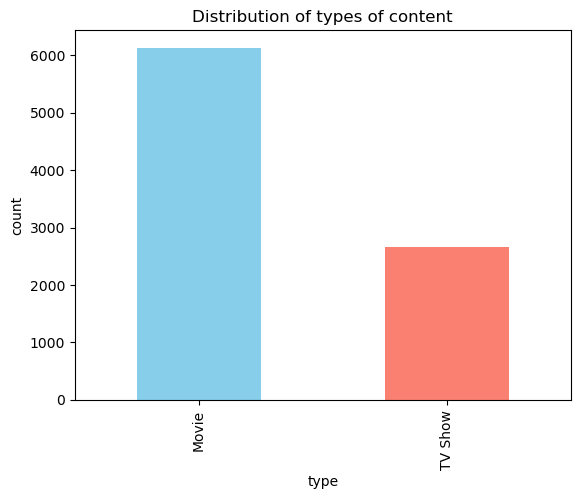

In [74]:
df["type"].value_counts().plot(kind = "bar", color = ["skyblue","salmon"])
plt.title("Distribution of types of content")
plt.xlabel("type")
plt.ylabel("count")
plt.show()

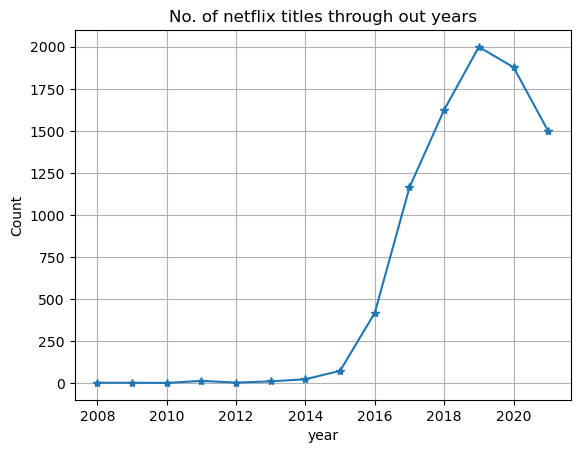

In [82]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["year_added"] = df["date_added"].dt.year 
df["year_added"].value_counts().sort_index().plot(kind = "line",marker = "*")
plt.title("No. of netflix titles through out years")
plt.xlabel("year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

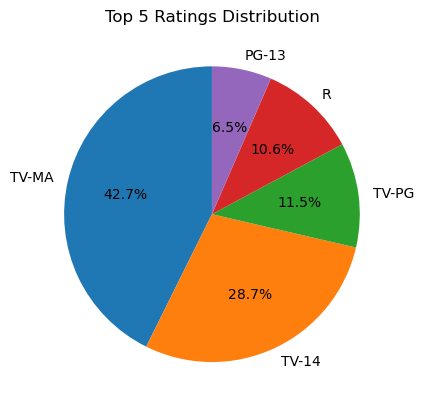

In [83]:
df["rating"].value_counts().head(5).plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Ratings Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()

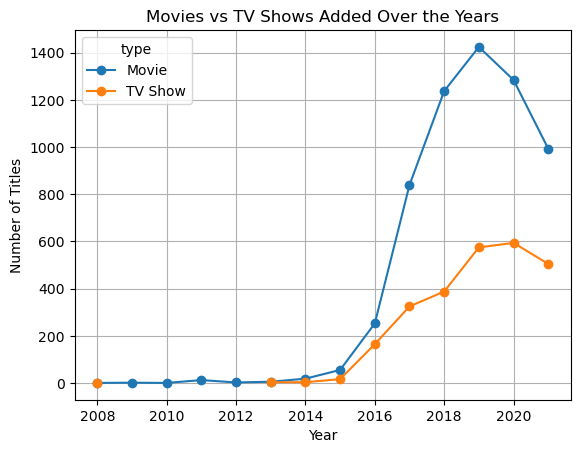

In [85]:
df["year_added"] = df["date_added"].dt.year
content_trend = df.groupby(["year_added", "type"]).size().unstack()
content_trend.plot(kind="line", marker="o")
plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

In [87]:
#exporting the file
df.to_csv("cleaned_netflix_data.csv", index=False)